# TimoshenkoModel: mesh-refinement study

In [65]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt

from utils import proputils as pu
import main
from names import GlobNames as gn

### Cantilever beam example

Consider the following model of a cantilever beam:

<center><img src="https://raw.githubusercontent.com/fmeer/public-files/main/5123/cantilever.png" alt="cantilever beam" width="300"/></center>

with $EI=2\cdot 10^4\,\mathrm{Nm}^2$, $GA_\mathrm{s} = 10^5\,\mathrm{N}$ and $P=1\,\mathrm{N}$.

The goal here is to examine the response of the finite element solution by considering the vertical displacement $v_\mathrm{p}$ under the point of application of the load $P$ and compare it with the analytical solution:

$$v_\mathrm{p}=\frac{PL^3}{3EI}+\frac{PL}{GA_\mathrm{s}}$$

Run the example with input file and mesh file given below and compare your results to the analytical solution.

In [66]:
props = pu.parse_file('timoshenko.pro')
globdat = main.jive(props)

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading manual mesh file timoshenko.mesh ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [10]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Model taking action advance
Model taking action getMatrix0
Model taking action getExtForce
Model taking action getConstraints
End of execution


What is the end-displacement? The solution vector is stored in `globdat[gn.STATE0]`. This contains values for all DOFs. Investigate which entry is the displacement at the loaded point and compare it to the analytical solution.

Can you also plot the displacement as function of $x$? And what about the rotations?

### Mesh-refinement study

Compare the end-displacement for different meshes. The comparisons should be made by producing numerical results with **1, 2, 4, 8, 16 and 32 elements** and drawing conclusions in terms of accuracy and convergence behavior for the two distinct scenarios below. 



Running model with 1 elements
Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading manual mesh file newmesh.mesh ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [1]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Model taking action advance
Model taking action getMatrix0
Model taking action getExtForce
Model taking action getConstraints
End of execution


Running model with 2 elements
Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading manual mesh file newmesh.mesh ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Model taking action advance
Model taking action getMatrix0
Model taking action getExtForce
Model taking action getConstrain

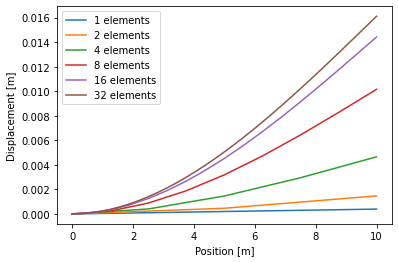

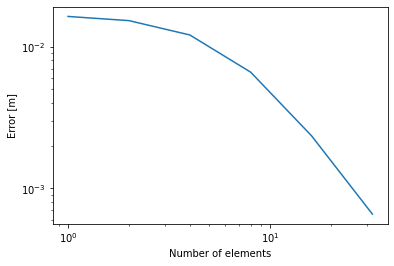

In [67]:
number_elements = [1,2,4,8,16,32];
L = 10
P = 1

def mesher(L,n):
    dx = L / n
    with open('newmesh.mesh', 'w') as fmesh:
        fmesh.write('nodes (ID, x, [y], [z])\n')
        for i in range(n + 1):
            fmesh.write('%d %f\n' % (i, i * dx))
        fmesh.write('elements (node#1, node#2, [node#3, ...])\n')
        for i in range(n):
            fmesh.write('%d %d\n' % (i, i + 1))
    return globdat   

plt.figure()
errors = []
props['init']['mesh']['file'] = 'newmesh.mesh'
EI = float(props['model']['timoshenko']['EI'])
GA = float(props['model']['timoshenko']['GAs'])

u_exact = P*L**3/3/EI + P*L/GA
for ne in number_elements:
    print('\n\nRunning model with',ne,'elements')
    mesher(L,ne)
    globdat = main.jive(props) 
    solution = globdat[gn.STATE0]
    plt.plot(np.linspace(0,L,ne+1),solution[ne+1:],label=str(ne) + ' elements')
    err = abs(globdat[gn.STATE0][-1]-u_exact)  # evaluate the error here
    errors.append(err)

plt.xlabel('Position [m]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.show()

plt.figure()
plt.loglog(number_elements,errors)
plt.xlabel('Number of elements')
plt.ylabel('Error [m]')
plt.show()

### Improve the convergence
The analysis shown above suffers from shear locking. Recall from the lecture how this can be fixed and try to improve the convergence behavior of the beam. Repeat the mesh-refinement study with a modification to your model and compare the accuracy with the results above.



Running model with 1 elements
Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading manual mesh file newmesh.mesh ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [1]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Model taking action advance
Model taking action getMatrix0
Model taking action getExtForce
Model taking action getConstraints
End of execution


Running model with 2 elements
Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading manual mesh file newmesh.mesh ...
InitModule: Creating node groups...
InitModule: Created group left with nodes [0]
InitModule: Created group right with nodes [2]
InitModule: Creating model...
Creating Line2Shape...
Running chain...
Running time step 0
Model taking action advance
Model taking action getMatrix0
Model taking action getExtForce
Model taking action getConstrain

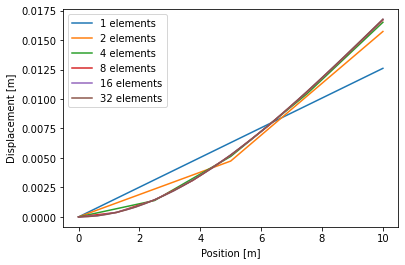

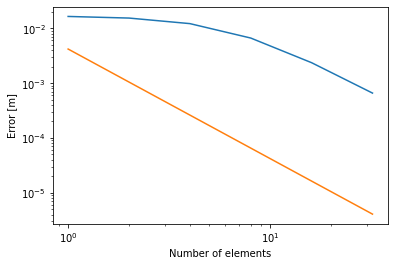

In [68]:
plt.figure()
errorsRI = []
props['model']['timoshenko']['shape']['intScheme'] = 'Gauss1'

for ne in number_elements:
    print('\n\nRunning model with',ne,'elements')
    mesher(L,ne)
    globdat = main.jive(props) 
    solution = globdat[gn.STATE0]
    plt.plot(np.linspace(0,L,ne+1),solution[ne+1:],label=str(ne) + ' elements')
    err = abs(globdat[gn.STATE0][-1]-u_exact)  # evaluate the error here
    errorsRI.append(err)

plt.xlabel('Position [m]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.show()

plt.figure()
plt.loglog(number_elements,errors,number_elements,errorsRI)
plt.xlabel('Number of elements')
plt.ylabel('Error [m]')
plt.show()